# 6. Raíz Unitaria

Consideremos el siguiente proceso:

$$y_t = 1.2 + y_{t - 1} + \epsilon_t$$

In [1]:
set.seed(12345)
epsilon <- rnorm(500, mean = 0, sd = 2); y <- rep(0, 500); y[1] <- 1
for (i in 2:500) {
    y[i] <- 1.2 + y[i - 1] + epsilon[i]
}

In [2]:
datos <- data.frame(t = 1:100, y = y[401:500])

In [3]:
library(ggplot2)

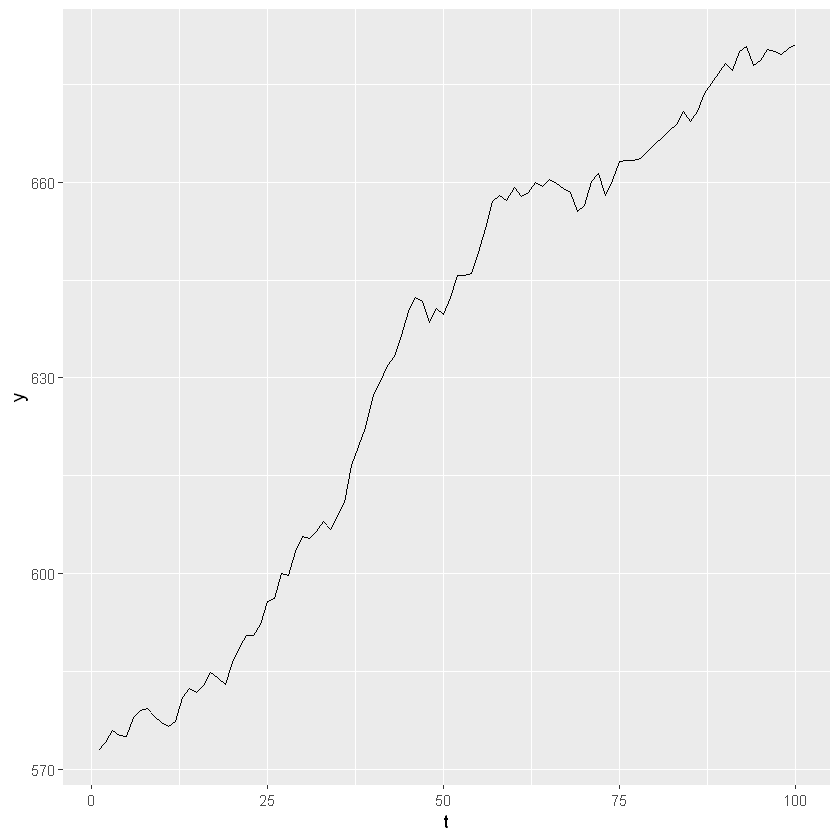

In [4]:
g <- ggplot(data = datos, aes(x = t, y = y))
g + geom_line()

Comparémoslo con el logaritmo del PIB de Bolivia:

In [6]:
setwd("..")

In [8]:
library(readxl)

In [9]:
pib <- read_xlsx("./Datos/PIB2.xlsx", sheet = 1, range = "B11:AG11", col_names = FALSE)

New names:
* `` -> ...1
* `` -> ...2
* `` -> ...3
* `` -> ...4
* `` -> ...5
* ...



In [11]:
Fecha <- seq(as.Date("01-01-1988", "%d-%m-%Y"), as.Date("01-01-2019", "%d-%m-%Y"), by = "year")

In [12]:
datos_pib <- data.frame(Fecha = Fecha, PIB = t(pib))

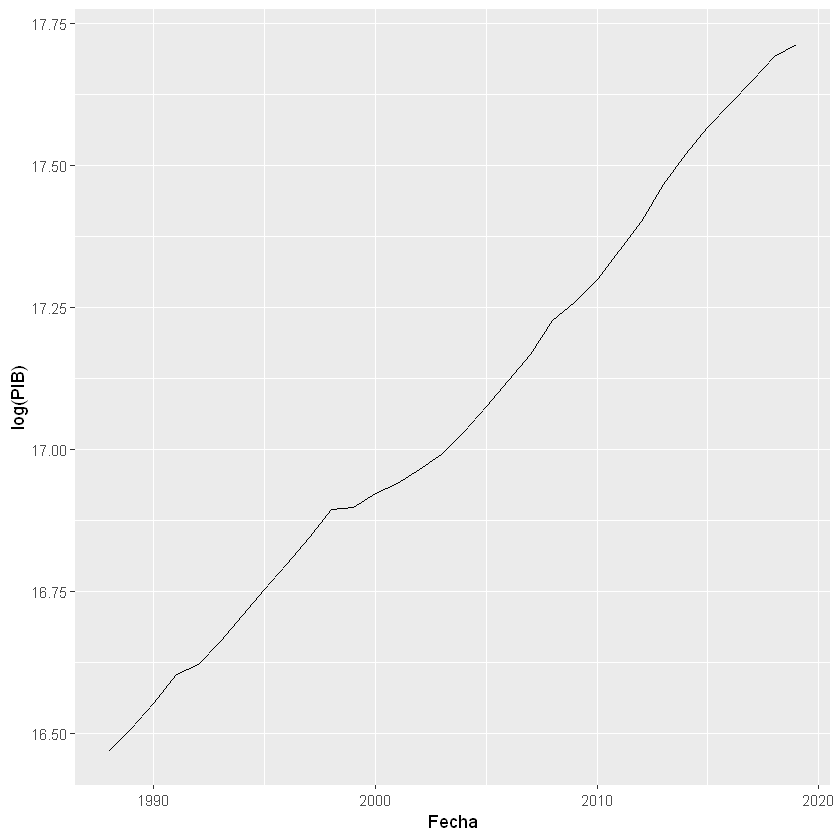

In [14]:
g <- ggplot(data = datos_pib, aes(x = Fecha, y = log(PIB)))
g + geom_line()

Ambos procesos parecería que tuvieran una tendencia determinística pero sabemos que el primer proceso no la tiene. Lo que si comparten ambos procesos es que no son estacionarios. Entonces ¿El logaritmo del PIB de Bolivia incluye una tendencia determinística o esta representado como un proceso similar al primer caso? En este capítulo estudiaremos procesos del primer tipo.

### 6.1 Procesos Integrados

Un proceso **integrado de orden 0** $\{y_t\}$ está definido como:

$$y_t = \delta + u_t$$

donde $u_t$ es un proceso estacionario de media 0. Un proceso **integrado de orden 1** $\{y_t\}$ se define como:

$$\Delta y_t = \delta + u_t$$

donde $\Delta = (1 - L)$. En general, un proceso **integrado de orden d** $\{y_t\}$ se defince como:

$$\Delta^d y_t = \delta + u_t$$

donde $\Delta^d = (1 - L)^d$

Por ejemplo el proceso que vimos al principio de este capítulo es un proceso integrado de orden 1.

In [15]:
datos$dy <- c(NA, diff(datos$y))

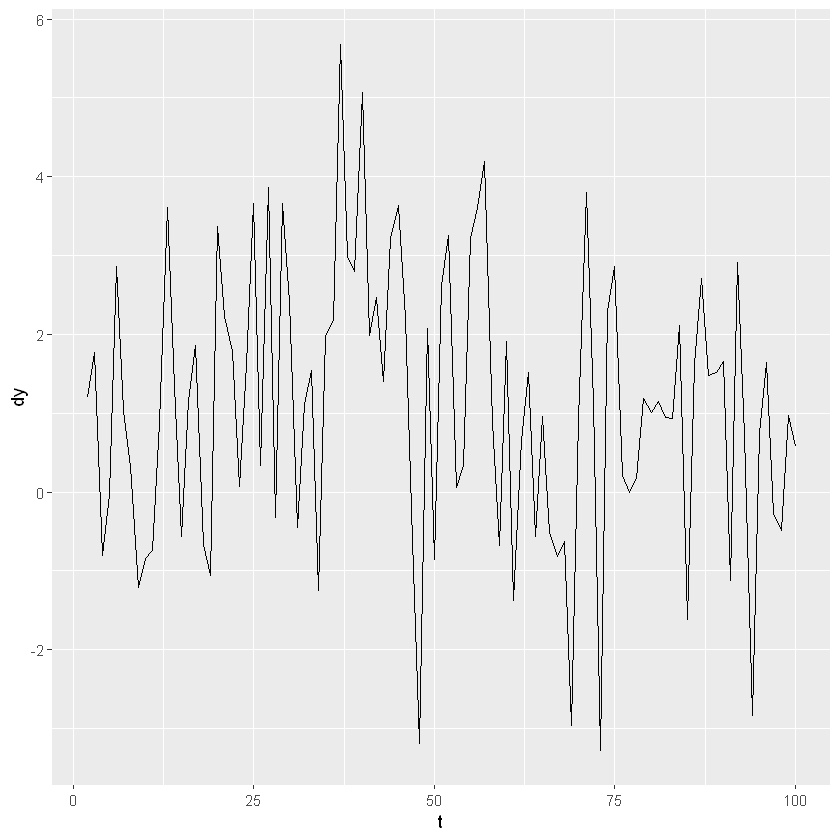

In [16]:
g <- ggplot(data = datos[2:100, ], aes(x = t, y = dy))
g + geom_line()

Consideremos el siguiente modelo AR(1):

$$y_t = c + \phi y_{t - 1} + \epsilon_t$$

cuyo polinomio carácteristico viene dado por: 

$$1 - \phi z = 0$$

para que el proceso AR(1) sea estacionario, la raiz de este polinomio tiene que ser mayor a 1. Si se da el caso que la raíz del polinomio es exactamente igual a 1 entonces tendríamos un proceso integrado de orden 1 lo que equivale a decir que el proceso tiene una raíz unitaria y $y_t$ no es un proceso estacionario.

### 3.2 Modelos ARIMA

Sea el siguiente proceso $y_t$:

$$y_t = \delta + u_t$$

donde $u_t$ es un proceso ARMA(p, q) con media 0; es decir:

$$(1 - \phi L - \phi^2 L^2 - \dots - \phi^p L^p)u_t = (1 + \theta L + \theta^2 L^2 + \dots + \theta^q L^q)$$

donde $\epsilon_t$ es un proceso ruido blanco. Entonces $y_t$ sería un proceso ARMA(p, q) con media $\mu = \frac{\delta}{1 - \phi - \phi^2 - \dots - \phi^p}$. 

Sabemos que el polinomio autoregresivo puede descomponerse como:

$$(1 - \phi L - \phi L^2 - \dots - \phi^p L ^p) = (1 - \lambda_1L)(1 - \lambda_2L)\dots(1 - \lambda_pL)$$

donde es requisito para que el proceso ARMA(p, q) sea estacionario que los autovalores $\lambda_i$ para $i = 1, 2, \dots, p$ estén dentro del círculo unitario o sean menores a 1 en módulo. ¿Qué sucede si uno de los autovalores es igual a 1 en módulo? Si se da el caso entonces $\Delta y_t$ sigue un proceso estacionario ARMA(p, q) lo que equivale a decir que $y_t$ sigue un proceso ARIMA(p, 1, q) donde el orden de integración de $y_t$ es 1 o de forma equivalente que tiene una raíz unitaria.

En forma general, si $\Delta^d y_t$ sigue un proceso ARMA(p, q) se dice que $y_t$ sigue un proceso ARIMA(p, d, q).

### 3.3 Implicancias de que el proceso sea I(1)

Existen tres importantes implicancias de que una serie de tiempo sea I(1): 

#### a) Implicancia en los pronósticos

Consideremos el siguiente proceso:

$$y_t = \alpha + \delta t + u_t$$
$$u_t = \phi u_{t - 1} + \epsilon_t$$

donde $\epsilon_t$ es un proceso ruido blanco. Entonces $y_t$ es un proceso AR(1) con tendencia. Se puede mostrar que el pronóstico de este proceso viene dado por:

$$\hat{y}_{t + s|t} = \alpha + \delta (t + s) + \phi^s u_t$$

¿Qué sucede si el proceso es estacionario? Es decir si $|\phi| < 1$ entonces el pronóstico converge hacia la tendencia del proceso $\alpha + \delta (t + s)$. Lo que es similar a lo que vimos en pronósticos de modelos ARMA que sus pronósticos convergen hacia la media no condicional del proceso. Ilustremos esto con el siguiente ejemplo:

$$y_t = 1.2 + 0.8 t + u_t$$
$$u_t = 0.6 u_{t - 1} + \epsilon_t$$

In [18]:
set.seed(12345)
epsilon <- rnorm(500, mean = 0, sd = 1.5); u <- rep(0, 500); t <- 1:100; y <- rep(0, 100); u[1] <- 1
for (i in 2:500) {
    u[i] <- 0.6 * u[i - 1] + epsilon[i]
}
for (i in 1:100) {
    y[i] <- 1.2 + 0.8 * t[i] + u[400 + i]
}

In [19]:
datos <- data.frame(t = t, y = y)

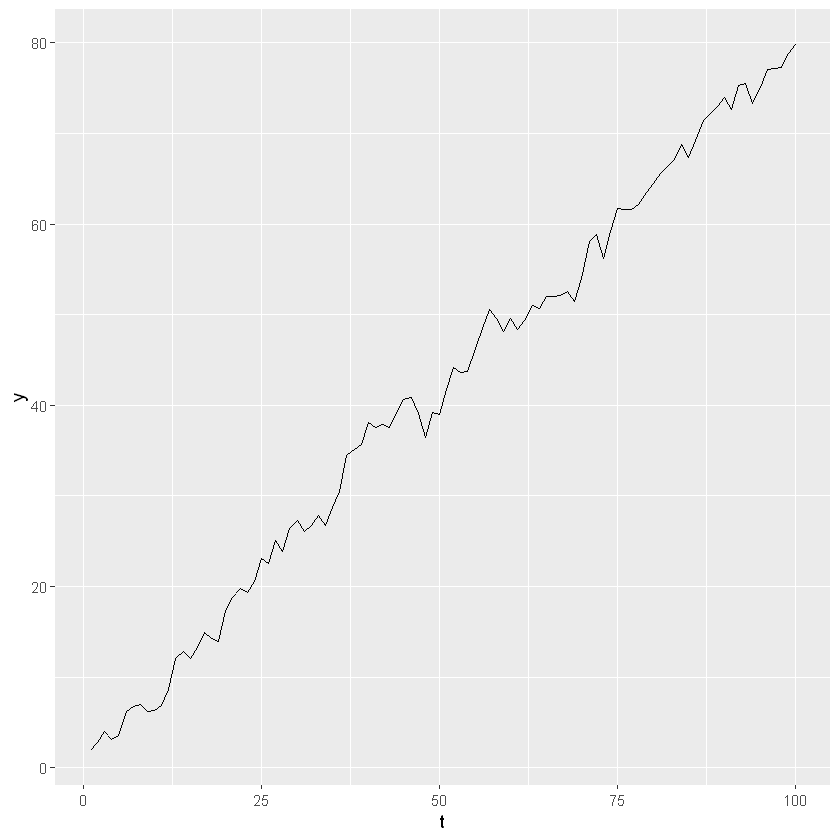

In [20]:
g <- ggplot(data = datos, aes(x = t, y = y))
g + geom_line()

In [40]:
ar1_mod <- arima(datos$y, order = c(1, 0, 0), xreg = datos$t)

In [41]:
ar1_mod


Call:
arima(x = datos$y, order = c(1, 0, 0), xreg = datos$t)

Coefficients:
         ar1  intercept  datos$t
      0.6875     1.6270   0.7875
s.e.  0.0711     0.7941   0.0135

sigma^2 estimated as 1.688:  log likelihood = -168.38,  aic = 344.77

In [42]:
ar1_for <- predict(ar1_mod, n.ahead = 50, newxreg = 101:150)

In [43]:
tend <- 1.2 + 0.8 * (101:150)

In [44]:
datos_for <- data.frame(t = 101:150, tend = tend, pred = ar1_for$pred)

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



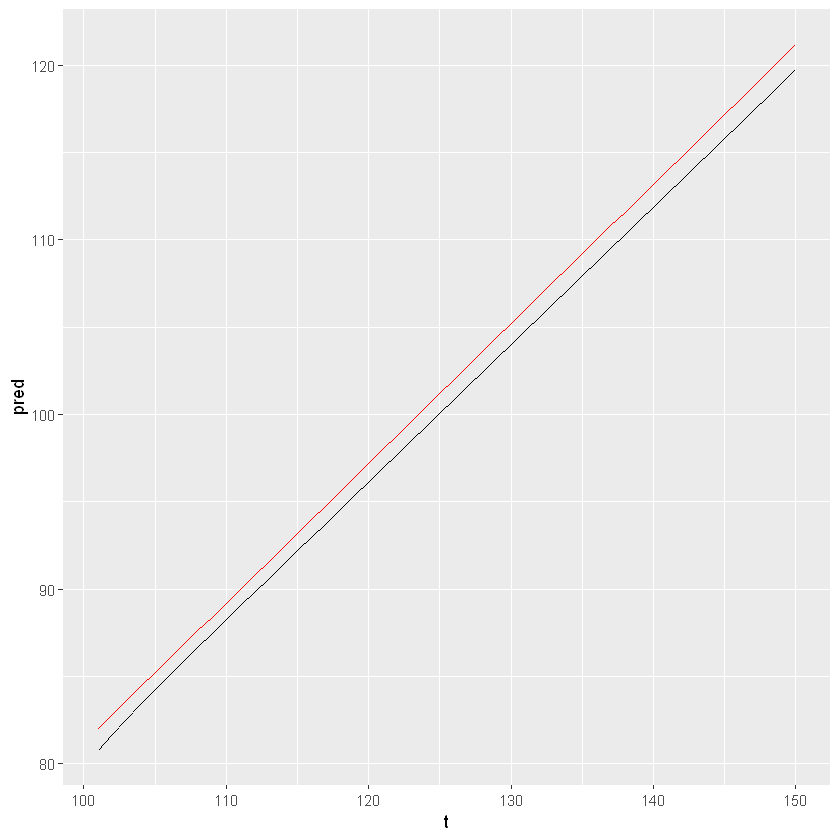

In [45]:
g <- ggplot(data = datos_for, aes(x = t))
g + geom_line(aes(y = pred)) + geom_line(aes(y = tend), colour = "red")

¿Qué sucede si el proceso tiene una raíz unitaria? El pronóstico de $y_{t + s}$ sería:

$$\hat{y}_{t + s} = \delta s + y_t$$

Entonces el pronóstico dependería del valor de la última observación considerada para el pronóstico y de ahí divergiría a una tasa $\delta$ cada periodo de pronóstico en el futuro. Ilustremos esto con el siguiente ejemplo:

$$y_t = 1.2 + 0.8 t + u_t$$
$$u_t = u_{t - 1} + \epsilon_t$$

In [46]:
set.seed(12345)
epsilon <- rnorm(500, mean = 0, sd = 1.5); u <- rep(0, 500); t <- 1:100; y <- rep(0, 100); u[1] <- 1
for (i in 2:500) {
    u[i] <- u[i - 1] + epsilon[i]
}
for (i in 1:100) {
    y[i] <- 1.2 + 0.8 * t[i] + u[400 + i]
}

In [47]:
datos <- data.frame(t = t, y = y)

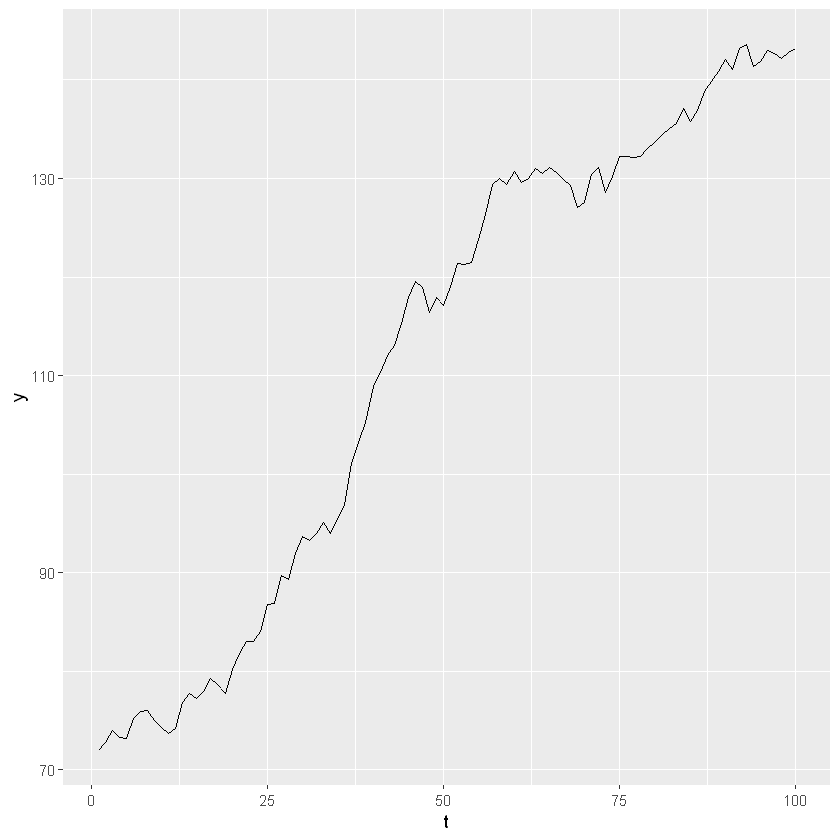

In [48]:
g <- ggplot(data = datos, aes(x = t, y = y))
g + geom_line()

In [51]:
ur1_mod <- arima(datos$y, order = c(1, 1, 0), xreg = datos$t)
ur1_mod


Call:
arima(x = datos$y, order = c(1, 1, 0), xreg = datos$t)

Coefficients:
         ar1  datos$t
      0.1544   0.7184
s.e.  0.0988   0.1553

sigma^2 estimated as 1.714:  log likelihood = -167.15,  aic = 340.3

In [52]:
ur1_for <- predict(ur1_mod, n.ahead = 50, newxreg = 101:150)

In [53]:
tend <- 1.2 + 0.8 * (101:150)

In [54]:
datos_for <- data.frame(t = 101:150, tend = tend, pred = ur1_for$pred)

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



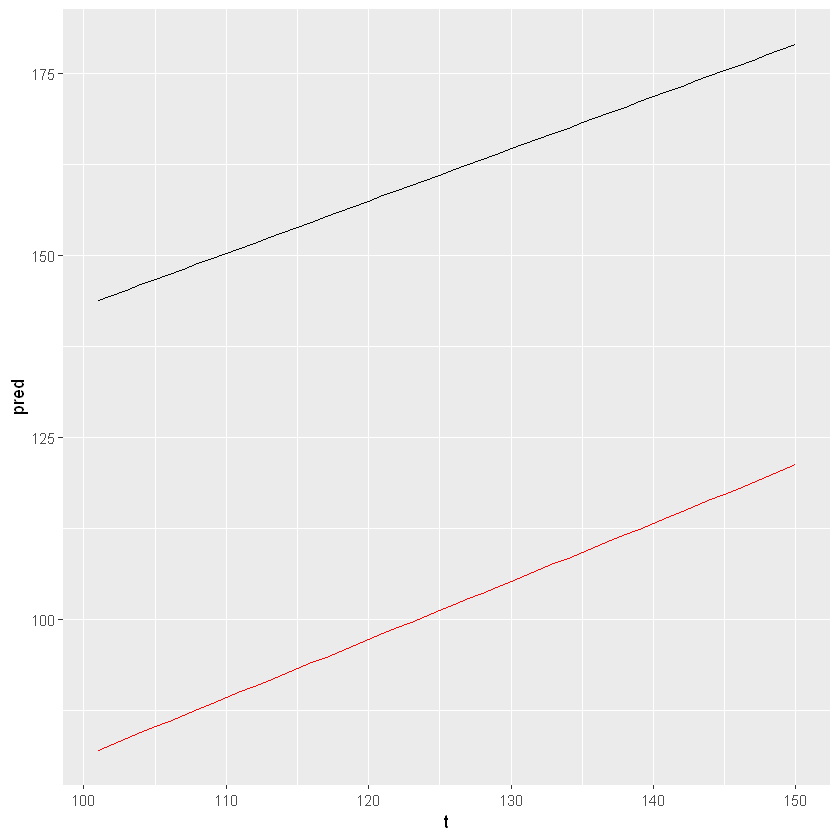

In [55]:
g <- ggplot(data = datos_for, aes(x = t))
g + geom_line(aes(y = pred)) + geom_line(aes(y = tend), colour = "red")

#### b) Implicancia en la varianza de los pronósticos

La varianza de los pronósticos tiene las siguientes características:

1. Para modelos estacionarios tiende a estabilizarse en la varianza no condicional del proceso.
2. Para los modelos integrados, la varianza de los pronósticos se incrementa a medida que se incrementa el número de periodos de pronóstico.

Podemos ver esto con los recientes modelos AR(1) vistos.

In [56]:
datos_vol <- data.frame(t = 1:50, vol_ar1 = ar1_for$se, vol_ur1 = ur1_for$se)

Don't know how to automatically pick scale for object of type ts. Defaulting to continuous.



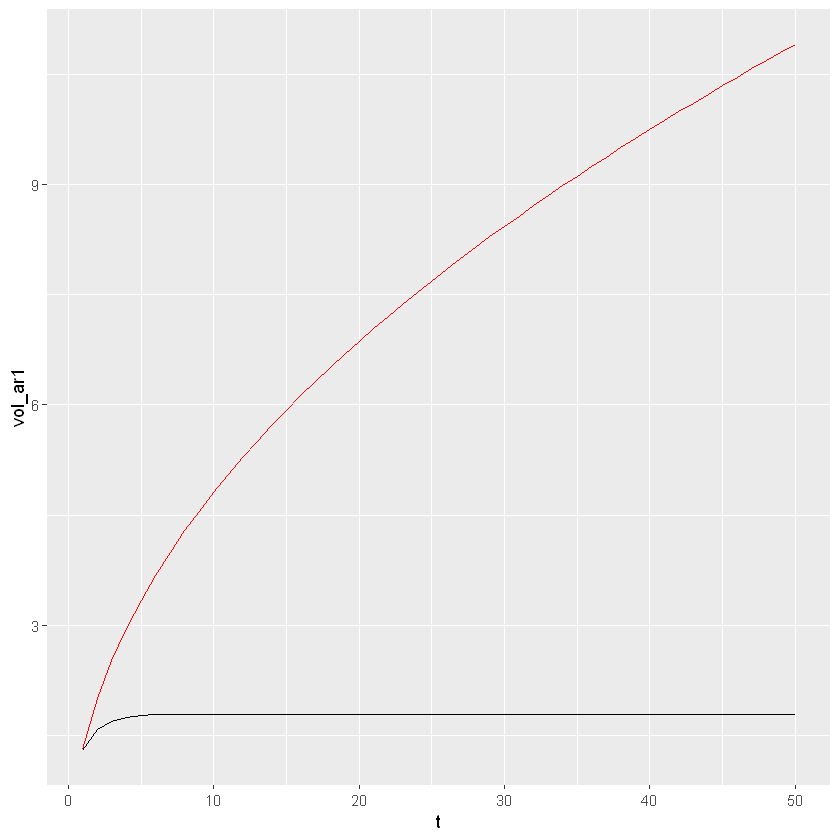

In [57]:
g <- ggplot(data = datos_vol, aes(x = t))
g + geom_line(aes(y = vol_ar1)) + geom_line(aes(y = vol_ur1), colour = "red")

#### c) Efecto de los shocks sobre los valores futuros del proceso bajo análisis

Las implicancias del efecto de shocks sobre el proceso son:

1. Si el proceso es estacionario los efectos de shocks son transitorios.
2. Si el proceso es I(1) entonces los efectos de los shocks son permanentes.

### 6.4 Descomposición de Beveridge-Nelson

Sea el proceso $\{y_t\}$ I(1) donde:

$$\Delta y_t = \delta + u_t$$

donde $u_t = \psi(L) \epsilon_t$ y $\epsilon_t$ es un proceso ruido blanco independiente y $\psi(L) = \psi_0 + \psi_1L + \psi^2 L^2 + \dots$ donde:

$$\sum^\infty_{j = 0}j|\psi_j| < \infty$$

que es un requerimiento más fuerte que la sumabilidad absoluta $\sum^\infty_{j = 0}|\psi_j| < \infty$ que requeríamos para procesos ARMA(p, q) estacionarios. Adicionalmente se requiere que $\psi(1) = \psi_0 + \psi_1 + \dots \neq 0$ que asegura que la varianza de largo plazo $\Delta y_t$ sea positiva.

Si se cumple todo esto, el proceso I(1) descrito puede ser expresado como:

$$y_t = \delta t + \psi(1)\sum^t_{s = 1} \epsilon_s + \eta_t + (y_0 - \eta_0)$$

donde $\nu_t$ es un proceso estacionario. En terminos generales, la descomposición de Beveridge-Nelson estipula que si se tiene un proceso $u_t$ que es I(0) con media 0 y cumple con los supuestos mencionados entonces:

$$u_1 + u_2 + \dots + u_t = \psi(1)(\epsilon_1 + \epsilon_2 + \dots + \epsilon_t) + \eta_t - \eta_0$$

### 6.5 Pruebas de Raíz Unitaria

#### a) Prueba de Dickey-Fuller Aumentada

Supongamos que tenemos el siguiente proceso $y_t$ I(0), entonces:

$$y_t = u_t$$

donde $u_t$ sigue un proceso AR(p + 1) es decir:

$$u_t = \phi_1 u_{t - 1} + \phi_2 u_{t - 2} + \dots + \phi_{p + 1} u_{t - p - 1} + \epsilon_t$$

Entonces es posible reescribir el proceso para $y_t$ como:

$$y_t = \rho y_{t - 1} + \zeta_1 \Delta y_{t - 1} + \zeta_2 \Delta y_{t - 2} + \dots + \zeta_p \Delta y_{t - p} + \epsilon_t$$

Esta es la ecuación base para verificar si el proceso $y_t$ tiene una raíz unitaria. Los pasos a seguir son:

1. Estimar la ecuación por OLS.
2. Calcular el estadístico $ADF_\rho: \frac{T(\hat{\rho} - 1)}{1 - \hat{\zeta_1} - \hat{\zeta_2} - \dots - \hat{\zeta_p}} \stackrel{d}\to DF_{\rho}$.
3. Si el valor del estadísticico calculado es menor que el valor crítico obtenido entonces rechazar la hipótesis nula de $\rho = 1$ y aceptar la hipótesis alternativa el proceso no es I(1).
4. Calcular el estadistico $ADF_t: t \stackrel{d}\to DF_t$
5. Si el estadístico es menor que el valor crítico obtenido entonces se rechaza la hipótesis nula que $\rho = 1$ y se acepta la hipótesis alternativa que el proceso no es I(1).

La prueba de ADF permite tambien considerar las opciones de que bajo la hipótesis nula el proceso I(1) tenga una constante o tenga una tendencia determinística. La selección de cualquiera de esas opciones depende del analista.

#### b) Prueba de ADF-GLS

La prueba ADF-GLS se la realiza en dos etapas:

1. Estimar por GLS una regresión con variable dependiente $y_t$ y variables independientes una constante o una constante y tendencia $t$.
2. Estimar los residuos de estas regresiones y efectuar los test ADF sin intercepto y sin tendencia.

#### c) Prueba de Phillips - Perron

La prueba de Phillips - Perron parte de la prueba original de Dickey-Fuller (que asume errores totalmente independientes en la regresión de MCO) pero al calcular los estadísticos $DF_\rho$ y $DF_t$ hace unos ajustes para incorporar la posible correlación serial en los residuos. En este sentido es una prueba complementaria a ADF.

#### d) Prueba de KPSS

Al contrario de todas las pruebas vistas hasta ahora la prueba de KPSS tiene la hipótesis nula que el proceso es I(0) es decir que es estacionario. Se compone de los siguientes pasos:

1. Estimar una regresión de $y_t$ con respecto a una constante y una tendencia.
2. Obtener los residuos de esta regresión $e_t$ y calcular $S_t = \sum^t_{j = 1} e_j$.
3. Calcular el estadístico $\eta = T^{-2}\frac{\sum^T_{j = 1}S^2_j}{s^2_l}$ donde $s^2_l$ es un estimador consistente de la varianza de largo plazo del proceso con $l$ rezagos. 

Podemos ilustrar todas estas pruebas para el caso del logaritmo del PIB de Bolivia.

In [58]:
library(urca)

In [59]:
adf_test <- ur.df(log(datos_pib$PIB), type = c("drift"), selectlags = c("BIC"))

In [65]:
summary(adf_test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.038405 -0.002342  0.002792  0.006560  0.021658 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
(Intercept) -0.011692   0.122757  -0.095   0.9248  
z.lag.1      0.002220   0.007318   0.303   0.7640  
z.diff.lag   0.343589   0.194990   1.762   0.0894 .
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01318 on 27 degrees of freedom
Multiple R-squared:  0.1256,	Adjusted R-squared:  0.06082 
F-statistic: 1.939 on 2 and 27 DF,  p-value: 0.1633


Value of test-statistic is: 0.3033 5.1987 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.58 -2.93 -2.60
phi1  7.06  4.86  3.94


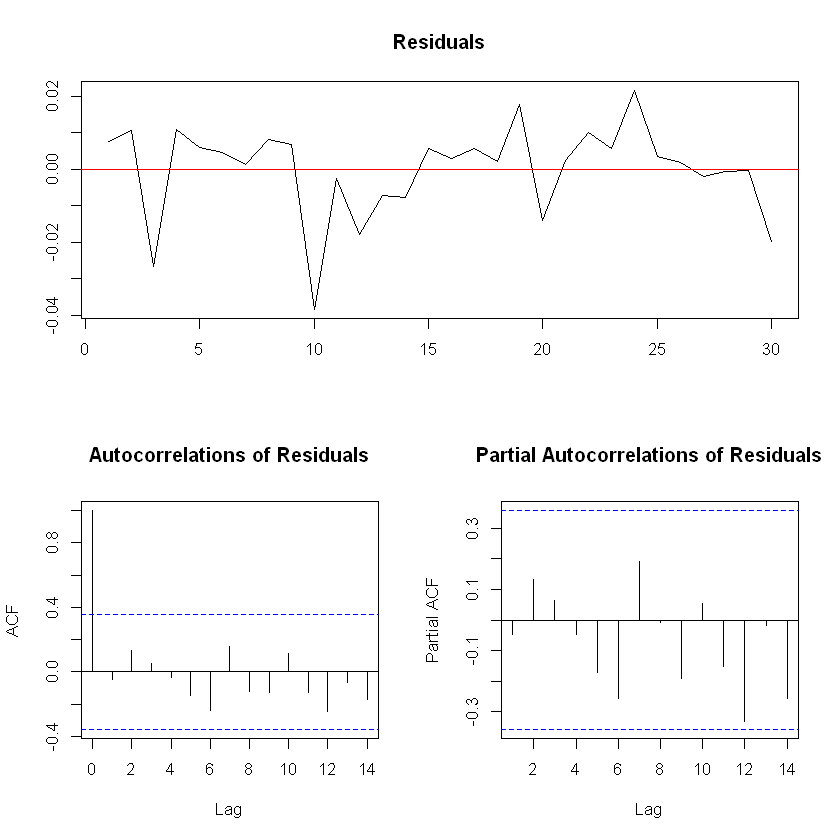

In [66]:
plot(adf_test)

In [69]:
adf_gls <- ur.ers(log(datos_pib$PIB), type = "DF-GLS", model = "constant", lag.max = 1)

In [70]:
summary(adf_gls)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.041765 -0.001116  0.003977  0.009534  0.025974 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
yd.lag       -0.001748   0.008329   -0.21    0.835    
yd.diff.lag1  0.936782   0.072909   12.85 2.92e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01522 on 28 degrees of freedom
Multiple R-squared:  0.8794,	Adjusted R-squared:  0.8708 
F-statistic: 102.1 on 2 and 28 DF,  p-value: 1.376e-13


Value of test-statistic is: -0.2098 

Critical values of DF-GLS are:
                 1pct  5pct 10pct
critical values -2.64 -1.95 -1.62


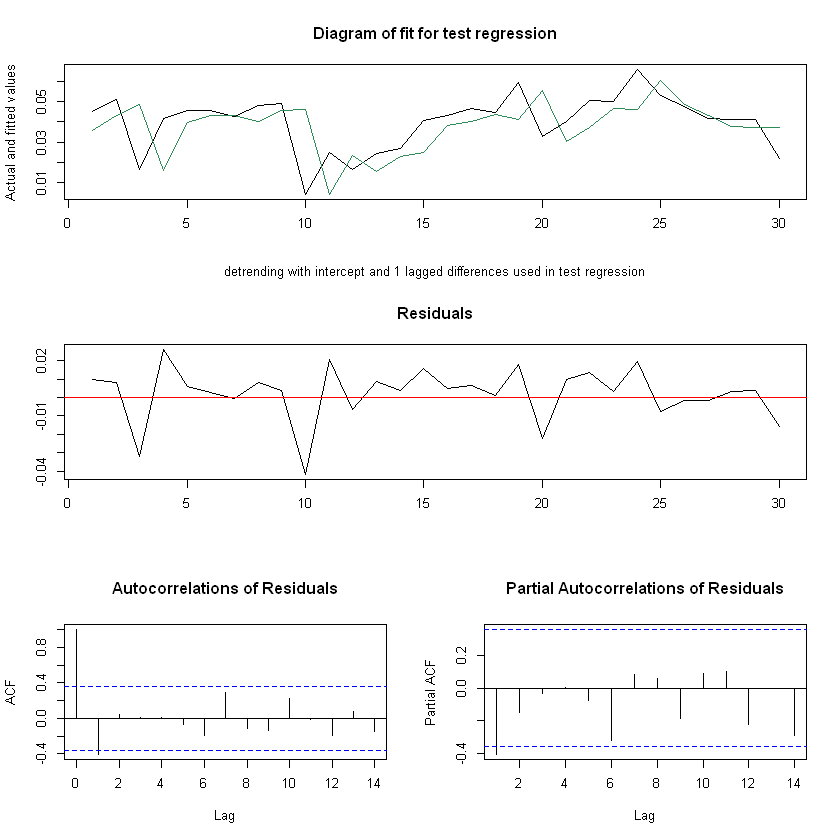

In [71]:
plot(adf_gls)

In [87]:
kpss_test <-ur.kpss(log(datos_pib$PIB), type = "tau", use.lag = 1) 

In [88]:
summary(kpss_test)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 1 lags. 

Value of test-statistic is: 0.3172 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


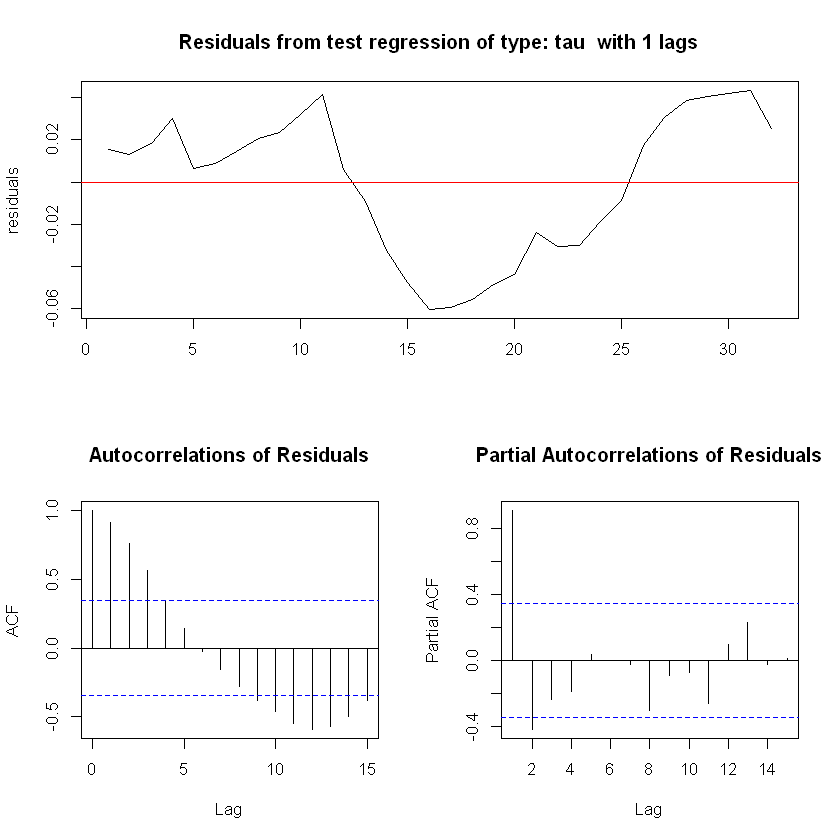

In [89]:
plot(kpss_test)

In [90]:
pp_test <- ur.pp(log(datos_pib$PIB), type = "Z-tau", model = "constant", use.lag = 1)

In [91]:
summary(pp_test)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034874 -0.005232  0.004124  0.008289  0.023564 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.062692   0.115664  -0.542    0.592    
y.l1         1.006027   0.006782 148.331   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.01343 on 29 degrees of freedom
Multiple R-squared:  0.9987,	Adjusted R-squared:  0.9986 
F-statistic: 2.2e+04 on 1 and 29 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: 0.752 

         aux. Z statistics
Z-tau-mu           -0.4482

Critical values for Z statistics: 
                     1pct      5pct     10pct
critical values -3.657453 -2.959122 -2.618149


### 6.6 Caso de Estudio: Paridad del Poder de Compra

La teoría de la paridad del poder de compra estipula que el tipo de cambio de un país respecto a otro debería ser igual al ratio de sus índices de precios respectivos. Por ejemplo, sea $S_t$ el tipo de cambio de bolivianos a dólares, y sea $P_t$ el índice de precios de Bolivia (que se conoce como IPC) y sea $P^*_t$ el índice de precios de Estados Unidos. Entonces se tiene que:

$$S_t = \frac{P_t}{P^*_t}$$

Expresado en logaritmos sería:

$$s_t = p_t - p^*_t$$

Por diversos motivos pueden existir desviaciones a esta paridad de poder de compra, llámense $z_t$:

$$z_t = s_t - p_t + p^*_t$$

A estas desviaciones se las conoce también como el **tipo de cambio real**. Entonces para que se verifique la PPC, es necesario que el tipo de cambio real sea estacionario.

Para verificar la PPC, utilizaremos los datos del tipo de cambio real del dólar americano con respecto a la libra esterlina. Los datos provienen del capítulo 9 del libro de Hayashi(2000).

In [93]:
if (!file.exists("./Datos/tcr.xls")) {
    url <- "http://fhayashi.fc2web.com/hayashi%20econometrics/ch9/lt.xls"
    download.file(url, destfile = "./Datos/tcr.xls", mode = "wb")
}

In [94]:
library(readxl)

In [95]:
datos <- read_xls("./Datos/tcr.xls", sheet = 1, range = "A1:D201")

In [96]:
head(datos)

YEAR,S,USWPI,UKWPI
<dbl>,<dbl>,<dbl>,<dbl>
1791,4.5802,85.6,110.6
1792,4.4925,93.7,108.7
1793,4.5353,102.7,119.2
1794,4.7765,108.8,121.5
1795,4.5730,131.9,141.7
1796,4.3114,147.0,143.2


In [97]:
tail(datos)

YEAR,S,USWPI,UKWPI
<dbl>,<dbl>,<dbl>,<dbl>
1985,1.2833,879.0,2489.2
1986,1.4670,853.5,2601.3
1987,1.6389,876.3,2698.3
1988,1.7814,911.5,2817.8
1989,1.6397,956.3,2962.2
1990,1.7841,990.6,3064.3


In [98]:
datos$Fecha <- seq(as.Date("01-01-1791", "%d-%m-%Y"), as.Date("01-01-1990", "%d-%m-%Y"), by = "year")

In [99]:
datos$z <- log(datos$S) - log(datos$USWPI) + log(datos$UKWPI)

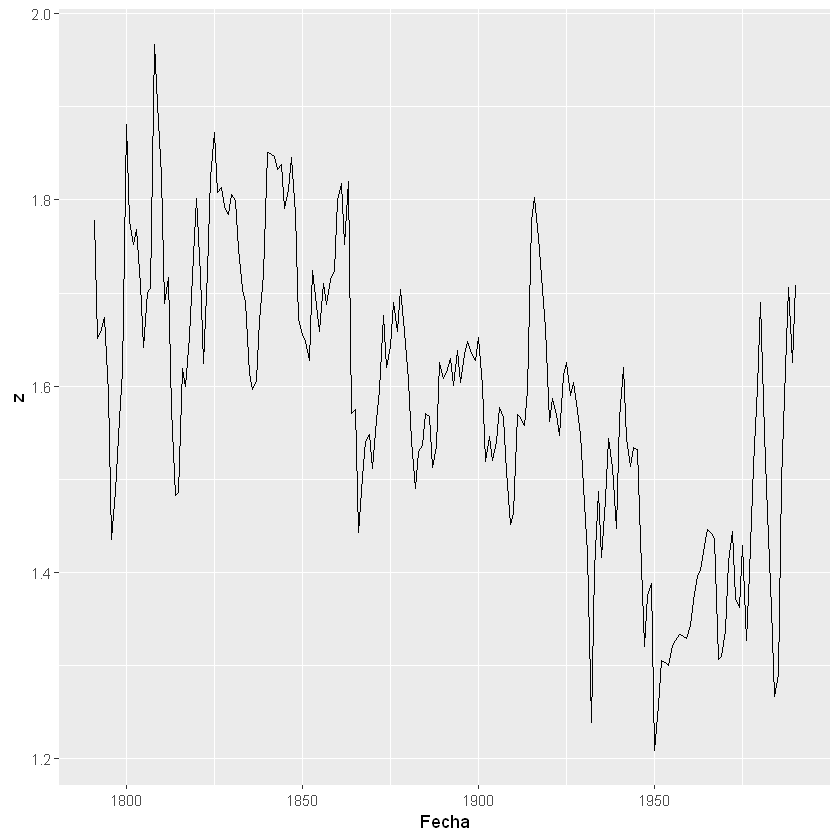

In [100]:
g <- ggplot(data = datos, aes(x = Fecha, y = z))
g + geom_line()

In [101]:
adf_test <- ur.df(datos$z, type = c("drift"), selectlags = c("BIC"))

In [102]:
summary(adf_test)


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression drift 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + z.diff.lag)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.228645 -0.035456 -0.001937  0.039164  0.275859 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.19330    0.05310   3.640 0.000349 ***
z.lag.1     -0.12158    0.03331  -3.650 0.000336 ***
z.diff.lag   0.11875    0.07071   1.679 0.094683 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07053 on 195 degrees of freedom
Multiple R-squared:  0.06736,	Adjusted R-squared:  0.05779 
F-statistic: 7.042 on 2 and 195 DF,  p-value: 0.001115


Value of test-statistic is: -3.6503 6.6644 

Critical values for test statistics: 
      1pct  5pct 10pct
tau2 -3.46 -2.88 -2.57
phi1  6.52  4.63  3.81


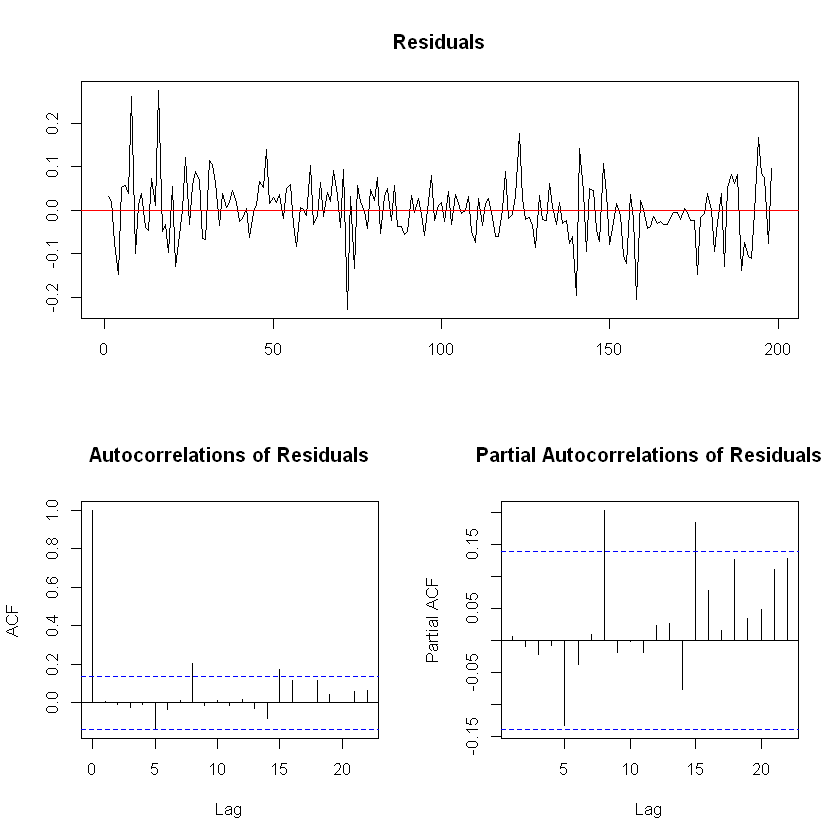

In [103]:
plot(adf_test)

In [104]:
adf_gls <- ur.ers(datos$z, type = "DF-GLS", model = "constant", lag.max = 1)

In [105]:
summary(adf_gls)


############################################### 
# Elliot, Rothenberg and Stock Unit Root Test # 
############################################### 

Test of type DF-GLS 
detrending of series with intercept 


Call:
lm(formula = dfgls.form, data = data.dfgls)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.24971 -0.04881 -0.00771  0.03097  0.25994 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)  
yd.lag       -0.06145    0.02379  -2.583   0.0105 *
yd.diff.lag1  0.09099    0.07083   1.285   0.2004  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.0715 on 196 degrees of freedom
Multiple R-squared:  0.03643,	Adjusted R-squared:  0.02659 
F-statistic: 3.705 on 2 and 196 DF,  p-value: 0.02634


Value of test-statistic is: -2.5831 

Critical values of DF-GLS are:
                 1pct  5pct 10pct
critical values -2.58 -1.94 -1.62


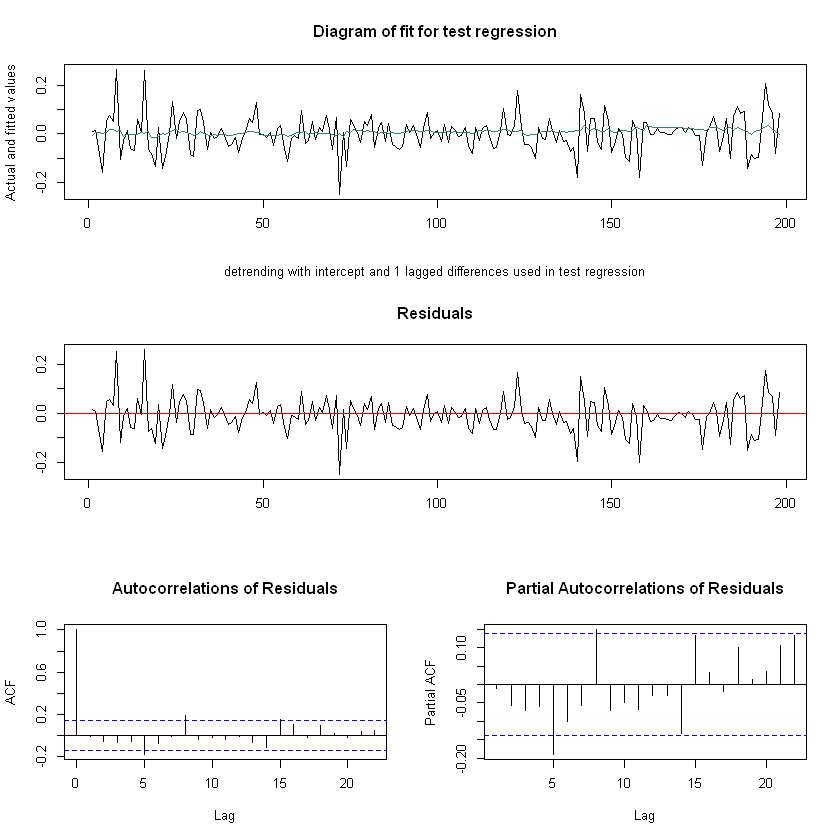

In [106]:
plot(adf_gls)

In [107]:
kpss_test <-ur.kpss(datos$z, type = "tau", use.lag = 1) 

In [108]:
summary(kpss_test)


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 1 lags. 

Value of test-statistic is: 0.2487 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


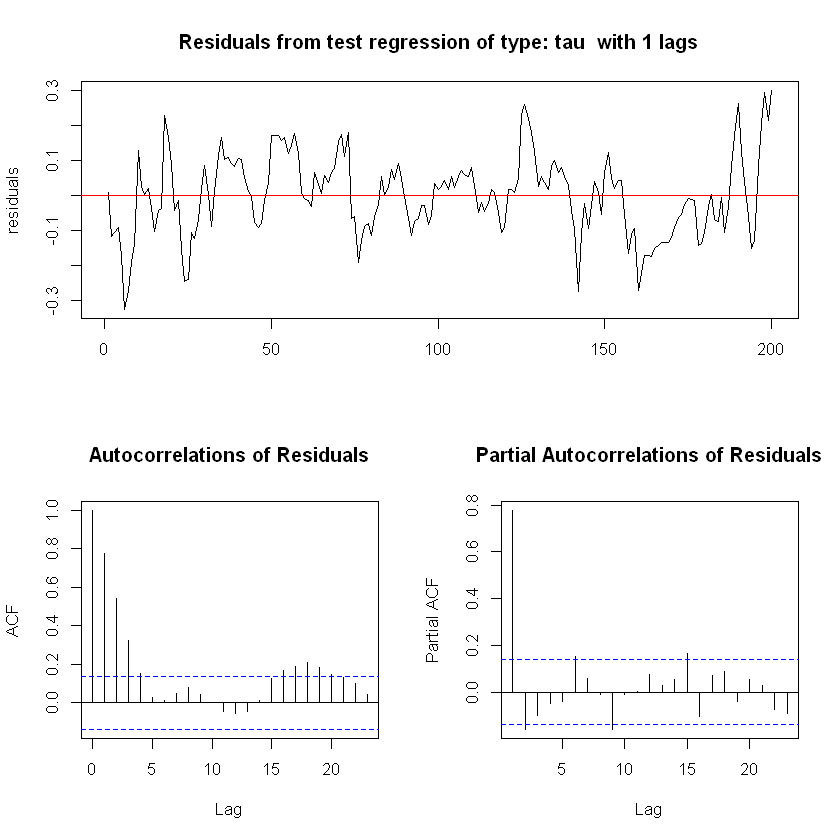

In [109]:
plot(kpss_test)

In [110]:
pp_test <- ur.pp(datos$z, type = "Z-tau", model = "constant", use.lag = 1)

In [111]:
summary(pp_test)


################################## 
# Phillips-Perron Unit Root Test # 
################################## 

Test regression with intercept 


Call:
lm(formula = y ~ y.l1)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.221971 -0.033154 -0.002466  0.039181  0.275978 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.17922    0.05194   3.451 0.000684 ***
y.l1         0.88690    0.03256  27.238  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.07107 on 197 degrees of freedom
Multiple R-squared:  0.7902,	Adjusted R-squared:  0.7891 
F-statistic: 741.9 on 1 and 197 DF,  p-value: < 2.2e-16


Value of test-statistic, type: Z-tau  is: -3.6336 

         aux. Z statistics
Z-tau-mu              3.61

Critical values for Z statistics: 
                     1pct     5pct     10pct
critical values -3.464384 -2.87607 -2.574439


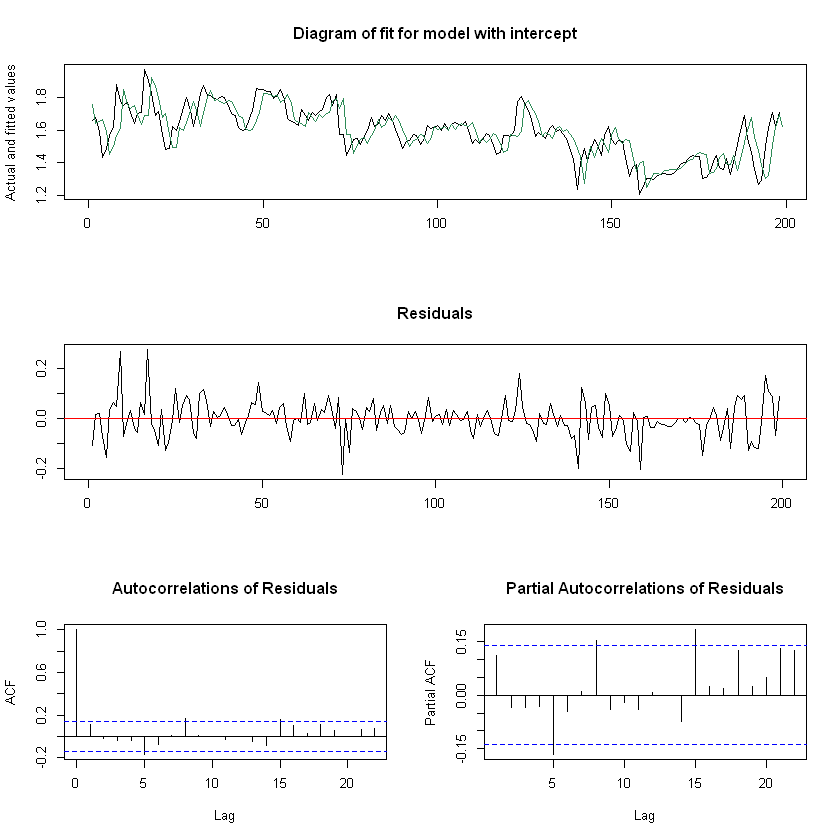

In [112]:
plot(pp_test)

La documentación del paquete `urca` puede ser vista [aqui](https://cran.r-project.org/web/packages/urca/urca.pdf).